In [1]:
# import libraries -> add in github
! pip install matplotlib
! pip install json
! pip install pandas
! pip install sklearn
! pip install http
! pip install pickle

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
  Using cached http-0.02.tar.gz (32 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/3g/7h4t3p497d75m2s9kpxb12xh0000gn/T/pip-install-y8zxko30/http_42665d307e394edfb8a82c34133e39ed/setup.py", line 3, in <module>
          import http
        File "/private/var/folders/3g/7h4t3p497d75m2s9kpxb12xh0000gn/T/pip-install-y8zxko30/http_42665d307e394edfb8a82c34133e39ed/http/__init__.py", line 17, in <module>
          from request import Request
      ModuleNotFoundError: No module named 'request'
      [end of output]
  
  note: This error origina

In [2]:
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pickle

In [3]:
latitude = 52.52
longitude = 13.41
start_date = "2000-04-01"
end_date = "2023-04-27"
filename = f"test_{latitude}_{longitude}.csv"
filename_forecast = f"test_{latitude}_{longitude}_forecast.csv"


In [4]:
filename

'test_52.52_13.41.csv'

In [5]:

response = requests.get(f"https://archive-api.open-meteo.com/v1/era5?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m,relativehumidity_2m,precipitation,windspeed_10m")
response = json.loads(response.content)

In [6]:
def fetch_data_from_api_response(response):
    temp_col = response["hourly"]["temperature_2m"]
    humidity_col= response["hourly"] ["relativehumidity_2m"]
    ppt_col=response["hourly"] ["precipitation"]
    wind_col= response["hourly"] ["windspeed_10m"]
    data_dict = {
        # "time":time_col,
        "temperature":temp_col,
        "humidity":humidity_col,
        "precipitation":ppt_col,
        "windspeed":wind_col
    }
    weather_data = pd.DataFrame(data_dict)
    return weather_data

In [7]:
data = fetch_data_from_api_response(response)
data.to_csv(filename,index=False)

In [8]:
def buildModel(df, y_column):
    # dropping all the rows with None values
    df = df.dropna(how='all')

    # drop column with name temperature from X ( i.e seperating input data and target)
    X = df.drop(y_column, axis=1)
    X_values = X.values

    # target in this case is temperature
    y = df[y_column]

    X_train, X_test, y_train, y_test = train_test_split(X_values, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    return model,y_test,y_pred,X.columns.values


In [9]:
# csv file to load data from the above experiment
df = pd.read_csv(filename)
df

,temperature,humidity,precipitation,windspeed
0,3.8,89,0.0,9.0
1,3.7,88,0.0,8.6
2,3.4,88,0.0,8.2
3,3.2,89,0.0,7.5
4,3.0,89,0.0,7.3
...,...,...,...,...
202243,7.3,72,0.0,6.9
202244,6.0,71,0.0,6.6
202245,5.4,72,0.0,5.8
202246,3.9,79,0.0,6.0


In [10]:
# build model based on the y_label in the variables
y_label = input("target: ")
model,y_test,y_pred, labels = buildModel(df,y_label)

In [11]:
pickle.dump(model, open('regression_model.pkl', 'wb'))

In [12]:
labels

array(['temperature', 'precipitation', 'windspeed'], dtype=object)

In [13]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 171.34495916507794


In [14]:
# date to predict
date_to_predict = "2023-05-06"

In [15]:
# print(f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m,relativehumidity_2m,precipitation,windspeed_10m&start_date={date_to_predict}&end_date={date_to_predict}')
response_forecast = requests.get(f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m,relativehumidity_2m,precipitation,windspeed_10m&start_date={date_to_predict}&end_date={date_to_predict}')
response_forecast = json.loads(response_forecast.content)

In [16]:
data_forecast = fetch_data_from_api_response(response_forecast)
data_forecast

,temperature,humidity,precipitation,windspeed
0,10.7,72,1.5,11.6
1,9.9,78,5.1,13.4
2,9.6,79,1.2,14.4
3,8.7,85,0.6,11.8
4,8.2,84,1.0,13.0
5,8.1,83,0.0,10.4
6,7.9,82,0.2,11.5
7,7.9,83,0.1,10.4
8,8.1,83,0.0,11.5
9,8.6,84,0.0,9.7


In [17]:
x_forecast = data_forecast.drop(y_label, axis=1)
y_forecast = data_forecast[y_label]

In [18]:
x_forecast

,temperature,precipitation,windspeed
0,10.7,1.5,11.6
1,9.9,5.1,13.4
2,9.6,1.2,14.4
3,8.7,0.6,11.8
4,8.2,1.0,13.0
5,8.1,0.0,10.4
6,7.9,0.2,11.5
7,7.9,0.1,10.4
8,8.1,0.0,11.5
9,8.6,0.0,9.7


In [19]:
y_forecast

0     72
1     78
2     79
3     85
4     84
5     83
6     82
7     83
8     83
9     84
10    83
11    79
12    80
13    80
14    78
15    85
16    86
17    82
18    86
19    86
20    88
21    89
22    89
23    90
Name: humidity, dtype: int64

In [20]:
x_forecast = x_forecast.values
y_forecast = y_forecast.values

In [21]:
regression_model = pickle.load(open('regression_model.pkl', 'rb'))

In [22]:
y_forecast_pred = regression_model.predict(x_forecast)

In [23]:
def plot_predicted(y_forecast, y_predicted):
    x = [i for i in range(1,25)]
    plt.plot(x,y_forecast)
    plt.plot(x,y_predicted)
    plt.ylabel(y_label)
    plt.xlabel("Hour in a day")
    plt.title("Predicted " + y_label + " VS " + "Forecasted " + y_label)
    plt.legend(['Forecast', 'Predicted'])
    plt.show()
    return y_forecast, y_predicted

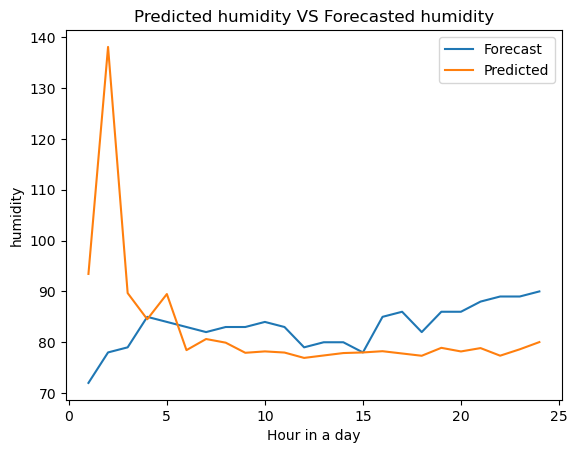

In [24]:
y_forecast, y_predicted  = plot_predicted(y_forecast, y_forecast_pred)

In [25]:
y_predicted

array([ 93.44019252, 138.09746757,  89.67216479,  84.51977827,
        89.48403986,  78.44978793,  80.63659777,  79.92025428,
        77.92770231,  78.20193113,  77.9751683 ,  76.9204519 ,
        77.40034594,  77.87496923,  77.99626226,  78.23884465,
        77.79058973,  77.3423348 ,  78.90331726,  78.19138232,
        78.85058052,  77.35815436,  78.61326888,  80.03186435])

In [26]:
y_forecast

array([72, 78, 79, 85, 84, 83, 82, 83, 83, 84, 83, 79, 80, 80, 78, 85, 86,
       82, 86, 86, 88, 89, 89, 90])

In [27]:
mse = mean_squared_error(y_forecast, y_predicted)
print("Mean square error for forecast data : " + str(mse))

Mean square error for forecast data : 209.18585374612323


In [28]:
if y_label == "temperature":
   plt.show() 
elif y_label == "humidity":
  plt.show()
elif y_label == "precipitation":
  plt.show()
else:
 plt.show()